In [2]:
import numpy as np
import matplotlib.pyplot as plt

True


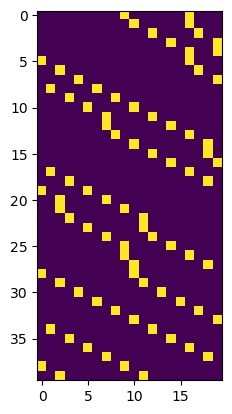

In [12]:
time_limit = 40
road_length = 20
car_density = 0.2

def count_ones(arr):
    count = 0
    for num in arr:
        if num == 1:
            count += 1
    return count

def get_traffic_data(car_density):

    positions_seed = np.random.choice([0, 1], road_length, p=[1-car_density, car_density])
    acceleration = 1
    deceleration = -2
    max_speed = 2


    brake_chance = 0.1
    brake_deceleration = -5


    look_ahead_global = min(np.size(positions_seed), 2)


    def get_distance_until_next_car(road, index):
        i = 0
        for cell in range(index+1, index+len(road)):
            i += 1
            if (road[cell%len(road)] == 1):
                return i
        return look_ahead_global+1

    # def get_neighbors(road, index, look_ahead):
    #     look_ahead = min(np.size(road), look_ahead)

    #     neighbors = [0]*look_ahead

    #     for i in range(index+1, index+look_ahead):
    #         neighbors[i-(index+1)] = road[i%np.size(road)]
        
    #     return neighbors

    def get_velocity_change(road, index, look_ahead):
        if road[index] == 1:
            if np.random.rand() < brake_chance:
                return brake_deceleration
            elif get_distance_until_next_car(road, index) <= look_ahead:
                return deceleration
            else:
                return acceleration
        return 0



    # data[t][x][0] is whether there is a car at x at time t, data[t][x][1] is the current velocity (affects next position) of the car in that place
    data = np.zeros((time_limit, road_length, 2), dtype="int8")

    velocities_seed = np.zeros(np.shape(positions_seed))

    for i in range(np.size(velocities_seed)):
        velocities_seed[i] = max(0, min(max_speed, get_velocity_change(positions_seed, i, look_ahead_global)))

    data[0] = np.column_stack((positions_seed, velocities_seed))
    for t in range(1, np.size(data, axis=0)):
        for x in range(np.size(data, axis=1)):
            new_x = (x + data[t-1][x][1])%road_length
            if (data[t-1][x][0] == 1):
                data[t][new_x][0] = data[t-1][x][0]
                data[t][new_x][1] = data[t-1][x][1]

        for x in range(np.size(data, axis=1)):
            velocity_change = get_velocity_change(data[t][:, 0], x, look_ahead_global)

            data[t][x][1] = max(0, min(max_speed, data[t][x][1] + velocity_change))


    positions = data[:, :, 0]
    velocities = data[:, :, 1]
    return positions, velocities

positions, velocities = get_traffic_data(car_density)
counts = np.array([count_ones(positions[i]) for i in range(len(positions))])
print((counts == counts[0]).all())
plt.imshow(positions)
plt.show()

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3/dist-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[]

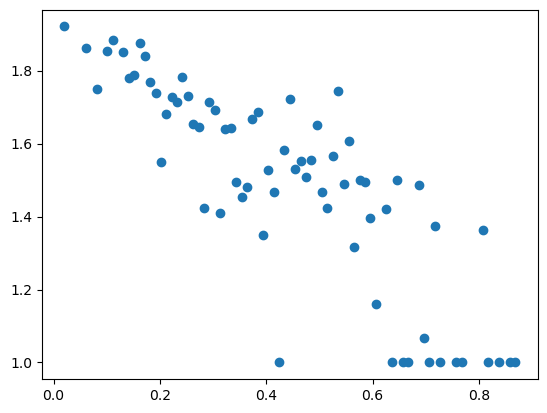

In [14]:
runs = 100

densities = np.linspace(0, 1, runs)
avg_velocities = np.empty(runs)
for run in range(runs):
    _, velocities = get_traffic_data(densities[run])
    avg_velocities[run] = np.mean(velocities[velocities != 0])

plt.scatter(densities, avg_velocities)
plt.plot()

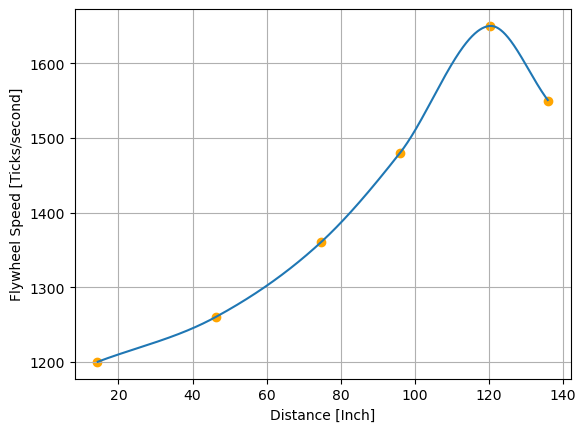

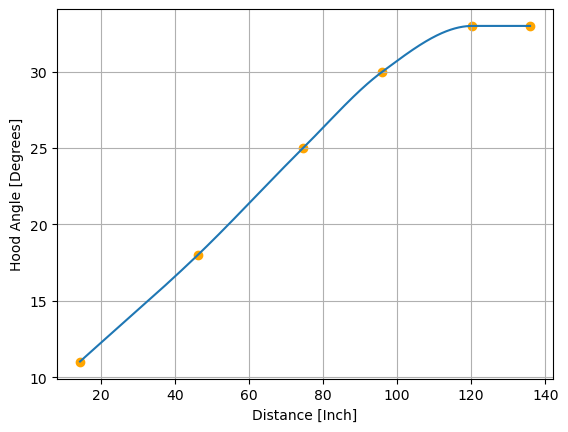

In [10]:
import matplotlib.pyplot as plt
x = [14.421700000000001, 14.5434, 14.6651, 14.786800000000001, 14.9085, 15.0302, 15.151900000000001, 15.2736, 15.3953, 15.517000000000001, 15.6387, 15.7604, 15.882100000000001, 16.003800000000002, 16.125500000000002, 16.2472, 16.3689, 16.4906, 16.6123, 16.734, 16.8557, 16.9774, 17.0991, 17.2208, 17.3425, 17.4642, 17.585900000000002, 17.7076, 17.8293, 17.951, 18.0727, 18.1944, 18.3161, 18.437800000000003, 18.5595, 18.6812, 18.8029, 18.9246, 19.046300000000002, 19.168, 19.2897, 19.4114, 19.5331, 19.6548, 19.7765, 19.898200000000003, 20.0199, 20.1416, 20.2633, 20.385, 20.506700000000002, 20.6284, 20.7501, 20.8718, 20.9935, 21.1152, 21.236900000000002, 21.358600000000003, 21.4803, 21.602, 21.7237, 21.8454, 21.967100000000002, 22.0888, 22.2105, 22.3322, 22.4539, 22.5756, 22.6973, 22.819000000000003, 22.9407, 23.0624, 23.1841, 23.3058, 23.427500000000002, 23.5492, 23.670900000000003, 23.7926, 23.9143, 24.036, 24.1577, 24.279400000000003, 24.4011, 24.5228, 24.6445, 24.7662, 24.887900000000002, 25.0096, 25.131300000000003, 25.253, 25.3747, 25.4964, 25.6181, 25.739800000000002, 25.8615, 25.9832, 26.1049, 26.2266, 26.348300000000002, 26.47, 26.591700000000003, 26.7134, 26.8351, 26.9568, 27.078500000000002, 27.200200000000002, 27.3219, 27.443600000000004, 27.5653, 27.687, 27.8087, 27.9304, 28.052100000000003, 28.1738, 28.2955, 28.4172, 28.5389, 28.660600000000002, 28.7823, 28.904000000000003, 29.0257, 29.1474, 29.2691, 29.3908, 29.512500000000003, 29.6342, 29.7559, 29.8776, 29.9993, 30.121000000000002, 30.2427, 30.3644, 30.4861, 30.6078, 30.7295, 30.851200000000002, 30.972900000000003, 31.0946, 31.2163, 31.338, 31.4597, 31.581400000000002, 31.703100000000003, 31.8248, 31.9465, 32.068200000000004, 32.1899, 32.3116, 32.4333, 32.555, 32.6767, 32.7984, 32.920100000000005, 33.0418, 33.1635, 33.2852, 33.4069, 33.5286, 33.6503, 33.772000000000006, 33.8937, 34.0154, 34.137100000000004, 34.2588, 34.3805, 34.5022, 34.623900000000006, 34.745599999999996, 34.8673, 34.989000000000004, 35.1107, 35.2324, 35.3541, 35.4758, 35.5975, 35.7192, 35.840900000000005, 35.9626, 36.0843, 36.206, 36.3277, 36.4494, 36.5711, 36.692800000000005, 36.8145, 36.9362, 37.057900000000004, 37.1796, 37.3013, 37.423, 37.544700000000006, 37.666399999999996, 37.7881, 37.909800000000004, 38.0315, 38.1532, 38.2749, 38.39660000000001, 38.518299999999996, 38.64, 38.761700000000005, 38.8834, 39.0051, 39.1268, 39.2485, 39.3702, 39.4919, 39.613600000000005, 39.7353, 39.857, 39.9787, 40.1004, 40.2221, 40.3438, 40.465500000000006, 40.5872, 40.7089, 40.830600000000004, 40.9523, 41.074, 41.1957, 41.317400000000006, 41.439099999999996, 41.5608, 41.682500000000005, 41.8042, 41.9259, 42.0476, 42.1693, 42.291, 42.4127, 42.534400000000005, 42.6561, 42.7778, 42.8995, 43.0212, 43.1429, 43.2646, 43.386300000000006, 43.508, 43.6297, 43.751400000000004, 43.8731, 43.9948, 44.1165, 44.238200000000006, 44.359899999999996, 44.4816, 44.603300000000004, 44.725, 44.8467, 44.9684, 45.0901, 45.2118, 45.3335, 45.455200000000005, 45.5769, 45.6986, 45.8203, 45.942, 46.0637, 46.1854, 46.307100000000005, 46.428799999999995, 46.5505, 46.672200000000004, 46.79390000000001, 46.9156, 47.0373, 47.159000000000006, 47.280699999999996, 47.4024, 47.524100000000004, 47.64580000000001, 47.7675, 47.8892, 48.01090000000001, 48.1326, 48.2543, 48.376000000000005, 48.497699999999995, 48.6194, 48.7411, 48.86280000000001, 48.9845, 49.1062, 49.227900000000005, 49.349599999999995, 49.4713, 49.593, 49.71470000000001, 49.8364, 49.9581, 50.079800000000006, 50.201499999999996, 50.3232, 50.444900000000004, 50.56660000000001, 50.6883, 50.81, 50.931700000000006, 51.053399999999996, 51.1751, 51.296800000000005, 51.418499999999995, 51.5402, 51.6619, 51.78360000000001, 51.9053, 52.027, 52.148700000000005, 52.270399999999995, 52.3921, 52.5138, 52.63550000000001, 52.7572, 52.8789, 53.000600000000006, 53.122299999999996, 53.244, 53.365700000000004, 53.48740000000001, 53.6091, 53.7308, 53.852500000000006, 53.974199999999996, 54.0959, 54.217600000000004, 54.33930000000001, 54.461, 54.5827, 54.70440000000001, 54.8261, 54.9478, 55.069500000000005, 55.191199999999995, 55.3129, 55.4346, 55.55630000000001, 55.678, 55.7997, 55.921400000000006, 56.043099999999995, 56.1648, 56.286500000000004, 56.40820000000001, 56.5299, 56.6516, 56.773300000000006, 56.894999999999996, 57.0167, 57.138400000000004, 57.26010000000001, 57.3818, 57.5035, 57.62520000000001, 57.7469, 57.8686, 57.990300000000005, 58.111999999999995, 58.2337, 58.3554, 58.47710000000001, 58.5988, 58.7205, 58.842200000000005, 58.963899999999995, 59.0856, 59.207300000000004, 59.32900000000001, 59.4507, 59.5724, 59.694100000000006, 59.815799999999996, 59.9375, 60.059200000000004, 60.18090000000001, 60.3026, 60.4243, 60.54600000000001, 60.667699999999996, 60.7894, 60.911100000000005, 61.032799999999995, 61.1545, 61.2762, 61.39790000000001, 61.5196, 61.6413, 61.763000000000005, 61.884699999999995, 62.0064, 62.1281, 62.24980000000001, 62.3715, 62.4932, 62.614900000000006, 62.736599999999996, 62.8583, 62.980000000000004, 63.10170000000001, 63.2234, 63.3451, 63.466800000000006, 63.588499999999996, 63.7102, 63.831900000000005, 63.95360000000001, 64.0753, 64.197, 64.3187, 64.4404, 64.5621, 64.6838, 64.8055, 64.9272, 65.0489, 65.17060000000001, 65.2923, 65.414, 65.5357, 65.6574, 65.7791, 65.9008, 66.02250000000001, 66.1442, 66.2659, 66.3876, 66.5093, 66.631, 66.7527, 66.87440000000001, 66.9961, 67.1178, 67.2395, 67.3612, 67.4829, 67.6046, 67.7263, 67.848, 67.9697, 68.09140000000001, 68.2131, 68.3348, 68.4565, 68.5782, 68.6999, 68.8216, 68.94330000000001, 69.065, 69.1867, 69.3084, 69.4301, 69.5518, 69.6735, 69.79520000000001, 69.9169, 70.0386, 70.1603, 70.282, 70.4037, 70.5254, 70.64710000000001, 70.7688, 70.8905, 71.0122, 71.1339, 71.2556, 71.3773, 71.499, 71.6207, 71.7424, 71.86410000000001, 71.9858, 72.1075, 72.2292, 72.3509, 72.4726, 72.5943, 72.71600000000001, 72.8377, 72.9594, 73.0811, 73.2028, 73.3245, 73.4462, 73.56790000000001, 73.6896, 73.8113, 73.933, 74.0547, 74.1764, 74.2981, 74.4198, 74.5415, 74.6632, 74.78490000000001, 74.9066, 75.0283, 75.15, 75.2717, 75.3934, 75.5151, 75.63680000000001, 75.7585, 75.8802, 76.0019, 76.1236, 76.2453, 76.367, 76.48870000000001, 76.6104, 76.7321, 76.8538, 76.9755, 77.0972, 77.2189, 77.34060000000001, 77.4623, 77.584, 77.70570000000001, 77.8274, 77.9491, 78.0708, 78.1925, 78.3142, 78.4359, 78.5576, 78.6793, 78.801, 78.92269999999999, 79.0444, 79.1661, 79.2878, 79.4095, 79.5312, 79.6529, 79.77459999999999, 79.8963, 80.018, 80.1397, 80.2614, 80.3831, 80.5048, 80.6265, 80.7482, 80.8699, 80.9916, 81.1133, 81.235, 81.3567, 81.4784, 81.6001, 81.7218, 81.84349999999999, 81.9652, 82.0869, 82.2086, 82.3303, 82.452, 82.5737, 82.69539999999999, 82.8171, 82.9388, 83.0605, 83.1822, 83.3039, 83.4256, 83.54729999999999, 83.669, 83.7907, 83.9124, 84.0341, 84.1558, 84.2775, 84.3992, 84.5209, 84.6426, 84.7643, 84.886, 85.0077, 85.1294, 85.2511, 85.3728, 85.4945, 85.61619999999999, 85.7379, 85.8596, 85.9813, 86.103, 86.2247, 86.3464, 86.46809999999999, 86.5898, 86.7115, 86.8332, 86.9549, 87.0766, 87.1983, 87.32, 87.4417, 87.5634, 87.6851, 87.8068, 87.9285, 88.0502, 88.1719, 88.2936, 88.4153, 88.53699999999999, 88.6587, 88.7804, 88.9021, 89.0238, 89.1455, 89.2672, 89.38889999999999, 89.5106, 89.6323, 89.754, 89.8757, 89.9974, 90.1191, 90.2408, 90.3625, 90.4842, 90.6059, 90.7276, 90.8493, 90.971, 91.0927, 91.2144, 91.3361, 91.45779999999999, 91.5795, 91.7012, 91.8229, 91.9446, 92.0663, 92.188, 92.30969999999999, 92.4314, 92.5531, 92.6748, 92.7965, 92.9182, 93.0399, 93.16159999999999, 93.2833, 93.405, 93.5267, 93.6484, 93.7701, 93.8918, 94.0135, 94.1352, 94.2569, 94.3786, 94.5003, 94.622, 94.7437, 94.8654, 94.9871, 95.1088, 95.23049999999999, 95.3522, 95.4739, 95.5956, 95.7173, 95.839, 95.9607, 96.08239999999999, 96.2041, 96.3258, 96.4475, 96.5692, 96.6909, 96.8126, 96.9343, 97.056, 97.1777, 97.2994, 97.4211, 97.5428, 97.6645, 97.7862, 97.9079, 98.0296, 98.15129999999999, 98.273, 98.3947, 98.5164, 98.6381, 98.7598, 98.8815, 99.00319999999999, 99.1249, 99.2466, 99.3683, 99.49, 99.6117, 99.7334, 99.8551, 99.9768, 100.0985, 100.2202, 100.3419, 100.4636, 100.5853, 100.707, 100.8287, 100.9504, 101.0721, 101.1938, 101.3155, 101.4372, 101.5589, 101.6806, 101.8023, 101.92399999999999, 102.0457, 102.1674, 102.2891, 102.4108, 102.5325, 102.6542, 102.7759, 102.8976, 103.0193, 103.141, 103.2627, 103.3844, 103.5061, 103.6278, 103.7495, 103.8712, 103.9929, 104.1146, 104.2363, 104.358, 104.4797, 104.6014, 104.7231, 104.84479999999999, 104.9665, 105.0882, 105.2099, 105.3316, 105.4533, 105.575, 105.69669999999999, 105.8184, 105.9401, 106.0618, 106.1835, 106.3052, 106.4269, 106.5486, 106.6703, 106.792, 106.9137, 107.0354, 107.1571, 107.2788, 107.4005, 107.5222, 107.6439, 107.76559999999999, 107.8873, 108.009, 108.1307, 108.2524, 108.3741, 108.4958, 108.61749999999999, 108.7392, 108.8609, 108.9826, 109.1043, 109.226, 109.3477, 109.4694, 109.5911, 109.7128, 109.8345, 109.9562, 110.0779, 110.1996, 110.3213, 110.443, 110.5647, 110.6864, 110.8081, 110.9298, 111.0515, 111.1732, 111.2949, 111.4166, 111.53829999999999, 111.66, 111.7817, 111.9034, 112.0251, 112.1468, 112.2685, 112.3902, 112.5119, 112.6336, 112.7553, 112.877, 112.9987, 113.1204, 113.2421, 113.3638, 113.4855, 113.6072, 113.7289, 113.8506, 113.9723, 114.094, 114.2157, 114.3374, 114.45909999999999, 114.5808, 114.7025, 114.8242, 114.9459, 115.0676, 115.1893, 115.31099999999999, 115.4327, 115.5544, 115.6761, 115.7978, 115.9195, 116.0412, 116.1629, 116.2846, 116.4063, 116.528, 116.6497, 116.7714, 116.8931, 117.0148, 117.1365, 117.2582, 117.3799, 117.5016, 117.6233, 117.745, 117.8667, 117.9884, 118.1101, 118.23179999999999, 118.3535, 118.4752, 118.5969, 118.7186, 118.8403, 118.962, 119.0837, 119.2054, 119.3271, 119.4488, 119.5705, 119.6922, 119.8139, 119.9356, 120.0573, 120.179, 120.3007, 120.4224, 120.5441, 120.6658, 120.7875, 120.9092, 121.0309, 121.15259999999999, 121.2743, 121.396, 121.5177, 121.6394, 121.7611, 121.8828, 122.0045, 122.1262, 122.2479, 122.3696, 122.4913, 122.613, 122.7347, 122.8564, 122.9781, 123.0998, 123.2215, 123.3432, 123.4649, 123.5866, 123.7083, 123.83, 123.9517, 124.0734, 124.1951, 124.3168, 124.4385, 124.5602, 124.6819, 124.8036, 124.9253, 125.047, 125.1687, 125.2904, 125.4121, 125.5338, 125.6555, 125.7772, 125.8989, 126.0206, 126.1423, 126.264, 126.3857, 126.5074, 126.6291, 126.7508, 126.8725, 126.9942, 127.1159, 127.2376, 127.3593, 127.481, 127.6027, 127.7244, 127.84609999999999, 127.9678, 128.08950000000002, 128.21120000000002, 128.3329, 128.4546, 128.5763, 128.698, 128.8197, 128.94140000000002, 129.06310000000002, 129.1848, 129.3065, 129.4282, 129.5499, 129.6716, 129.79330000000002, 129.91500000000002, 130.0367, 130.1584, 130.2801, 130.4018, 130.5235, 130.64520000000002, 130.7669, 130.8886, 131.0103, 131.132, 131.2537, 131.3754, 131.49710000000002, 131.6188, 131.7405, 131.8622, 131.9839, 132.1056, 132.2273, 132.34900000000002, 132.4707, 132.5924, 132.7141, 132.8358, 132.9575, 133.07920000000001, 133.20090000000002, 133.3226, 133.4443, 133.566, 133.6877, 133.8094, 133.93110000000001, 134.05280000000002, 134.1745, 134.2962, 134.4179, 134.5396, 134.6613, 134.78300000000002, 134.90470000000002, 135.0264, 135.1481, 135.2698, 135.3915, 135.5132, 135.63490000000002, 135.75660000000002, 135.8783]
angles = [11.026699075158795, 11.053385738130592, 11.08006013261934, 11.106722402328986, 11.133372690963462, 11.160011142226715, 11.186637899822692, 11.213253107455333, 11.239856908828584, 11.26644944764638, 11.29303086761267, 11.319601312431399, 11.346160925806506, 11.372709851441934, 11.399248233041625, 11.425776214309527, 11.45229393894958, 11.478801550665725, 11.505299193161907, 11.531787010142072, 11.558265145310155, 11.584733742370107, 11.61119294502587, 11.637642896981381, 11.664083741940589, 11.690515623607434, 11.716938685685857, 11.743353071879808, 11.769758925893225, 11.79615639143005, 11.822545612194228, 11.848926731889703, 11.875299894220415, 11.90166524289031, 11.928022921603327, 11.954373074063415, 11.980715843974513, 12.007051375040563, 12.033379810965508, 12.059701295453296, 12.086015972207864, 12.112323984933157, 12.13862547733312, 12.164920593111695, 12.191209475972823, 12.217492269620449, 12.24376911775851, 12.270040164090965, 12.296305552321737, 12.322565426154783, 12.348819929294041, 12.375069205443454, 12.40131339830696, 12.427552651588513, 12.453787108992048, 12.480016914221512, 12.506242210980844, 12.53246314297399, 12.558679853904888, 12.58489248747749, 12.611101187395734, 12.63730609736356, 12.663507361084918, 12.689705122263744, 12.715899524603982, 12.742090711809581, 12.768278827584476, 12.794464015632617, 12.820646419657944, 12.846826183364396, 12.873003450455922, 12.899178364636464, 12.925351069609961, 12.951521709080366, 12.977690426751604, 13.003857366327631, 13.030022671512397, 13.056186486009823, 13.08234895352387, 13.108510217758479, 13.134670422417585, 13.160829711205139, 13.186988227825074, 13.213146115981345, 13.23930351937789, 13.265460581718646, 13.291617446707567, 13.317774258048589, 13.343931159445656, 13.370088294602713, 13.396245807223695, 13.422403841012557, 13.448562539673237, 13.474722046909672, 13.500882506425812, 13.5270440619256, 13.553206857112976, 13.579371035691887, 13.605536741366269, 13.631704117840073, 13.657873308817237, 13.6840444580017, 13.710217709097414, 13.73639320580832, 13.762571091838359, 13.788751510891473, 13.814934606671601, 13.841120522882699, 13.867309403228694, 13.893501391413539, 13.919696631141179, 13.94589526611555, 13.972097440040598, 13.998303296620266, 14.024512979558494, 14.050726632559229, 14.076944399326418, 14.10316642356399, 14.129392848975904, 14.155623819266093, 14.181859478138502, 14.208099969297075, 14.234345436445754, 14.260596023288482, 14.286851873529208, 14.313113130871862, 14.339379939020397, 14.365652441678755, 14.391930782550876, 14.418215105340709, 14.444505553752185, 14.470802271489259, 14.497105402255869, 14.523415089755957, 14.549731477693467, 14.576054709772343, 14.602384929696527, 14.628722281169964, 14.655066907896593, 14.681418953580359, 14.707778561925206, 14.734145876635075, 14.760521041413913, 14.78690419996566, 14.813295495994257, 14.83969507320365, 14.866103075297778, 14.89251964598059, 14.918944928956025, 14.945379067928027, 14.971822206600539, 14.998274488677506, 15.024736057862867, 15.051207057860566, 15.077687632374547, 15.104177925108758, 15.130678079767126, 15.157188240053614, 15.183708549672152, 15.210239152326688, 15.236780191721166, 15.263331811559521, 15.289894155545703, 15.316467367383657, 15.343051590777321, 15.36964696943064, 15.396253647047557, 15.422871767332012, 15.449501473987953, 15.47614291071932, 15.502796221230053, 15.529461549224102, 15.556139038405409, 15.58282883247791, 15.609531075145552, 15.636245910112283, 15.66297348108204, 15.689713931758764, 15.716467405846402, 15.743234047048897, 15.770013999070194, 15.796807405614226, 15.82361441038495, 15.8504351570863, 15.877269789422224, 15.904118451096657, 15.930981285813552, 15.957858437276844, 15.984750049190476, 16.011656265258402, 16.038577229184554, 16.065513084672872, 16.092463975427314, 16.11943004515181, 16.146411437550306, 16.173408296326745, 16.200420765185076, 16.227448987829234, 16.25449310796316, 16.281553269290804, 16.308629615516114, 16.335722290343018, 16.362831437475467, 16.38995720061741, 16.41709972347278, 16.44425914974552, 16.471435623139584, 16.498629287358902, 16.525840286107425, 16.55306876308909, 16.580314862007846, 16.607578726567635, 16.6348605004724, 16.66216032742608, 16.689478351132617, 16.716814715295968, 16.74416956362005, 16.771543039808837, 16.798935287566245, 16.82634645059623, 16.85377667260274, 16.881226097289705, 16.90869486836108, 16.9361831295208, 16.96369102447281, 16.99121869692105, 17.018766290569467, 17.046333949122005, 17.073921816282606, 17.101530035755207, 17.12915875124376, 17.156808106452207, 17.184478245084488, 17.212169310844537, 17.239881447436314, 17.267614798563756, 17.295369507930793, 17.323145719241396, 17.350943576199477, 17.378763222508997, 17.406604801873897, 17.43446845799811, 17.462354334585598, 17.490262575340285, 17.518193323966123, 17.54614672416706, 17.574122919647024, 17.60212205410997, 17.63014427125984, 17.658189714800574, 17.686258528436113, 17.714350855870403, 17.74246684080739, 17.770606626951007, 17.79877035800521, 17.826958177673934, 17.855170229661123, 17.883406657670722, 17.91166760540667, 17.93995321657291, 17.968263634873395, 17.996599004012054, 18.024963211131862, 18.053362012035464, 18.08179520992479, 18.110262537449692, 18.13876372726003, 18.167298512005658, 18.19586662433643, 18.224467796902207, 18.25310176235285, 18.281768253338203, 18.310467002508144, 18.33919774251251, 18.367960206001158, 18.396754125623957, 18.42557923403076, 18.454435263871414, 18.48332194779579, 18.512239018453737, 18.541186208495105, 18.570163250569774, 18.59916987732758, 18.62820582141838, 18.65727081549204, 18.68636459219841, 18.715486884187353, 18.744637424108713, 18.773815944612366, 18.803022178348154, 18.832255857965944, 18.861516716115574, 18.890804485446925, 18.920118898609843, 18.949459688254176, 18.978826587029797, 19.008219327586552, 19.037637642574303, 19.0670812646429, 19.09654992644221, 19.12604336062208, 19.155561299832375, 19.18510347672294, 19.214669623943642, 19.244259474144336, 19.27387275997488, 19.30350921408513, 19.33316856912494, 19.36285055774416, 19.39255491259266, 19.422281366320295, 19.45202965157691, 19.481799501012382, 19.51159064727655, 19.541402823019272, 19.571235760890414, 19.60108919353982, 19.630962853617365, 19.660856473772892, 19.69076978665626, 19.720702524917332, 19.750654421205954, 19.780625208171987, 19.810614618465294, 19.84062238473573, 19.87064823963314, 19.900691915807396, 19.930753145908348, 19.960831662585854, 19.990927198489764, 20.021039486269945, 20.051168258576247, 20.081313248058528, 20.111474187366646, 20.141650809150466, 20.171842846059825, 20.2020500307446, 20.232272095854636, 20.262508774039787, 20.29275979794992, 20.323024900234884, 20.35330381354455, 20.383596270528752, 20.41390200383736, 20.444220746120234, 20.47455223002722, 20.50489618820818, 20.535252353312977, 20.565620457991464, 20.596000234893488, 20.62639141666892, 20.656793735967604, 20.687206925439412, 20.717630717734185, 20.748064845501794, 20.778509041392077, 20.808963038054905, 20.839426568140134, 20.869899364297623, 20.90038115917722, 20.93087168542879, 20.961370675702184, 20.991877862647254, 21.02239297891387, 21.052915757151883, 21.083445930011152, 21.11398323014152, 21.144527390192863, 21.175078142815025, 21.20563522065787, 21.236198356371247, 21.26676728260503, 21.29734173200905, 21.32792143723318, 21.358506130927267, 21.38909554574119, 21.419689414324786, 21.45028746932791, 21.480889443400425, 21.511495069192193, 21.54210407935306, 21.572716206532892, 21.603331183381542, 21.633948742548856, 21.664568616684715, 21.695190538438954, 21.72581424046144, 21.756439455402028, 21.787065915910574, 21.817693354636937, 21.848321504230967, 21.878950097342532, 21.909578866621477, 21.940207544717666, 21.97083586428095, 22.001463557961195, 22.03209035840825, 22.062715998271976, 22.093340210202225, 22.12396272684886, 22.154583280861736, 22.185201604890704, 22.215817431585624, 22.246430493596357, 22.277040523572747, 22.30764725416467, 22.33825041802197, 22.36884974779451, 22.399444976132138, 22.43003583568472, 22.460622059102107, 22.491203379034154, 22.521779528130725, 22.552350239041676, 22.582915244416853, 22.61347427690613, 22.644027069159346, 22.674573353826368, 22.705112863557055, 22.73564533100126, 22.766170488808836, 22.796688069629642, 22.827197806113546, 22.857699430910387, 22.88819267667003, 22.918677276042324, 22.94915296167714, 22.979619466224328, 23.01007652233374, 23.040523862655245, 23.070961219838686, 23.10138832653393, 23.131804915390823, 23.162210719059235, 23.192605470189015, 23.222988901430014, 23.2533607454321, 23.283720734845126, 23.314068602318944, 23.344404080503423, 23.374726902048405, 23.40503679960376, 23.43533350581933, 23.465616753344985, 23.495886274830575, 23.52614180292595, 23.556383070280983, 23.58660980954552, 23.616821753369425, 23.64701863440255, 23.677200185294748, 23.707366138695882, 23.737516227255803, 23.76765018362438, 23.79776774045145, 23.82786863038689, 23.857952586080536, 23.888019340182264, 23.918068625341927, 23.948100174209376, 23.978113719434464, 24.008108993667058, 24.03808572955701, 24.068043659754174, 24.097982516908413, 24.127902033669574, 24.157801942687527, 24.18768197661212, 24.217541868093214, 24.24738134978066, 24.277200154324316, 24.306998014374045, 24.3367746625797, 24.36652983159113, 24.396263254058205, 24.425974662630775, 24.455663789958695, 24.48533036869183, 24.51497413148003, 24.54459481097315, 24.57419213982105, 24.60376585067359, 24.63331567618062, 24.662841348991996, 24.692342601757584, 24.721819167127236, 24.751270777750808, 24.780697166278152, 24.81009806535914, 24.839473207643607, 24.868822325781423, 24.898145152422448, 24.92744142021653, 24.956710861813526, 24.985953209863307, 25.01517977082755, 25.044454280582798, 25.07378553997332, 25.10317239947129, 25.132613709548863, 25.1621083206782, 25.191655083331458, 25.2212528479808, 25.250900465098372, 25.280596785156355, 25.31034065862689, 25.340130935982156, 25.36996646769429, 25.399846104235472, 25.42976869607785, 25.459733093693593, 25.48973814755485, 25.519782708133786, 25.549865625902566, 25.57998575133334, 25.610141934898266, 25.640333027069516, 25.67055787831925, 25.70081533911961, 25.73110425994277, 25.761423491260892, 25.791771883546122, 25.822148287270636, 25.852551552906583, 25.88298053092612, 25.913434071801415, 25.943911026004635, 25.974410244007913, 26.004930576283442, 26.035470873303353, 26.066029985539828, 26.09660676346502, 26.12720005755107, 26.157808718270164, 26.188431596094443, 26.219067541496084, 26.24971540494723, 26.28037403692005, 26.31104228788671, 26.341719008319355, 26.372403048690153, 26.403093259471262, 26.433788491134834, 26.464487594153052, 26.495189418998045, 26.525892816141997, 26.55659663605706, 26.587299729215392, 26.61800094608915, 26.648699137150494, 26.679393152871597, 26.710081843724602, 26.740764060181675, 26.771438652714977, 26.80210447179666, 26.832760367898903, 26.863405191493847, 26.894037793053656, 26.924657023050496, 26.95526173195652, 26.9858507702439, 27.016422988384768, 27.046977236851315, 27.077512366115684, 27.108027226650037, 27.13852066892653, 27.168991543417334, 27.1994387005946, 27.22986099093049, 27.26025726489717, 27.29062637296679, 27.320967165611506, 27.351278493303496, 27.3815592065149, 27.411808155717896, 27.442024191384622, 27.47220616398726, 27.502352923997954, 27.532463321888873, 27.562536208132176, 27.59257043320001, 27.622564847564558, 27.652518301697953, 27.682429646072375, 27.71229773115998, 27.74212140743292, 27.771899525363352, 27.80163093542346, 27.83131448808538, 27.86094903382127, 27.890533423103307, 27.920066506403643, 27.949547134194432, 27.978974156947842, 28.008346425136025, 28.03766278923115, 28.066922099705366, 28.096123207030846, 28.125264961679733, 28.154346214124203, 28.18336581483641, 28.21232261428851, 28.241215462952667, 28.27004321130103, 28.29880470980578, 28.327498808939062, 28.356124359173027, 28.384680210979855, 28.413165214831693, 28.441578221200707, 28.469918080559058, 28.498183643378898, 28.526373760132387, 28.554487281291692, 28.58252305732897, 28.610479938716377, 28.638356775926074, 28.66615241943023, 28.693865719700987, 28.721495527210525, 28.74904069243098, 28.77650006583454, 28.803872497893344, 28.831156839079554, 28.858351939865337, 28.885456650722848, 28.912469822124248, 28.9393903045417, 28.96621694844735, 28.992948604313383, 29.01958412261193, 29.04612235381517, 29.072562148395264, 29.098902356824354, 29.12514182957462, 29.15127941711821, 29.177313969927283, 29.203244338474004, 29.22906937323053, 29.254787924669024, 29.280398843261636, 29.305900979480548, 29.331293183797886, 29.356574306685843, 29.381743198616554, 29.406798710062194, 29.431739691494922, 29.456564993386888, 29.48127346621025, 29.505863960437186, 29.530335326539845, 29.554686414990382, 29.578916076260956, 29.603023160823742, 29.627006519150882, 29.650865001714543, 29.67459745898689, 29.69820274144007, 29.72167969954626, 29.74502718377761, 29.768244044606273, 29.79132913250442, 29.814281297944206, 29.83709939139779, 29.85978226333733, 29.882328764234995, 29.904737744562933, 29.927008054793315, 29.94913854539829, 29.971128066850024, 29.992975469620674, 30.014716230671326, 30.036463985252805, 30.058225814626457, 30.080000466718293, 30.101786689454308, 30.123583230760513, 30.145388838562912, 30.16720226078751, 30.1890222453603, 30.210847540207304, 30.2326768932545, 30.254509052427913, 30.276342765653546, 30.2981767808574, 30.32000984596547, 30.341840708903767, 30.36366811759829, 30.385490819975047, 30.407307563960032, 30.42911709747927, 30.450918168458752, 30.472709524824484, 30.494489914502452, 30.516258085418688, 30.538012785499177, 30.55975276266993, 30.58147676485696, 30.603183539986244, 30.624871835983804, 30.646540400775653, 30.668187982287765, 30.68981332844618, 30.71141518717688, 30.732992306405865, 30.754543434059148, 30.776067318062722, 30.797562706342614, 30.819028346824805, 30.84046298743531, 30.86186537610013, 30.88323426074526, 30.904568389296724, 30.92586650968051, 30.947127369822624, 30.968349717649065, 30.98953230108584, 31.01067386805897, 31.031773166494435, 31.052828944318243, 31.073839949456413, 31.094804929834932, 31.115722633379807, 31.136591808017045, 31.15741120167266, 31.178179562272632, 31.19889563774298, 31.219558176009706, 31.24016592499881, 31.26071763263631, 31.28121204684819, 31.301647915560466, 31.322023986699136, 31.342339008190198, 31.362591727959675, 31.382780893933543, 31.402905254037833, 31.42296355619854, 31.442954548341657, 31.4628769783932, 31.482729594279164, 31.502511143925567, 31.522220375258392, 31.54185603620365, 31.56141687468736, 31.58090163863551, 31.60030907597411, 31.61963793462916, 31.638886962526666, 31.65805490759262, 31.677140517753045, 31.696142540933934, 31.715059725061295, 31.73389081806113, 31.752634567859438, 31.77128972238222, 31.7898550295555, 31.808329237305266, 31.82671109355752, 31.84499934623827, 31.863192743273522, 31.881290032589266, 31.899289962111524, 31.9171912797663, 31.934992733479582, 31.952693071177386, 31.970291040785714, 31.98778539023055, 32.00517486743793, 32.02245822033384, 32.03963419684429, 32.056701544895276, 32.073659012412804, 32.090505347322875, 32.1072392975515, 32.123859611024685, 32.14036503566843, 32.15675431940873, 32.1730262101716, 32.18917945588304, 32.20521280446904, 32.22112500385563, 32.2369148019688, 32.25258094673456, 32.2681221860789, 32.28353726792783, 32.29882494020737, 32.31398395084349, 32.32901304776222, 32.34391097888956, 32.35867649215151, 32.373308335474064, 32.387805256783246, 32.402166004005046, 32.416389325065474, 32.43047396789052, 32.44441868040621, 32.45822221053854, 32.4718833062135, 32.485400715357095, 32.49877318589535, 32.51199946575426, 32.52507830285982, 32.53800844513803, 32.55078864051491, 32.563417636916455, 32.57589418226867, 32.58821702449756, 32.600384911529126, 32.61239659128937, 32.62425081170429, 32.635946320699915, 32.64748186620222, 32.65885619613722, 32.67006805843093, 32.68111620100933, 32.69199937179844, 32.70271631872426, 32.7132657897128, 32.723646532690054, 32.73385729558203, 32.743896826314725, 32.75376387281415, 32.76345718300631, 32.77297550481721, 32.782317586172844, 32.791482174999224, 32.80046801922235, 32.80927386676823, 32.81789846556285, 32.82634056353224, 32.834598908602395, 32.842672248699316, 32.850559331749, 32.85825890567746, 32.8657697184107, 32.87309051787471, 32.88022005199551, 32.887157068699096, 32.89390031591148, 32.90044854155865, 32.90680049356662, 32.912954919861406, 32.918910568368986, 32.924666187015376, 32.93022052372658, 32.935572326428606, 32.94072034304745, 32.945663321509116, 32.95040000973962, 32.95492915566495, 32.95924950721112, 32.96335981230411, 32.96725881886997, 32.97094527483466, 32.974417928124204, 32.977675526664605, 32.980716818381865, 32.98354055120199, 32.98614547305097, 32.98853033185482, 32.99069387553955, 32.992634852031166, 32.99435200925564, 32.995844095139006, 32.99710985760727, 32.99814804458642, 32.99895740400246, 32.99953668378139, 32.99988463184925, 33.0, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 32.99999999999999, 32.99999999999999, 33.0, 33.0, 32.99999999999999, 33.0, 33.00000000000001, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.00000000000001, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 32.99999999999999, 33.00000000000001, 33.0, 33.0, 33.0, 33.0, 33.00000000000001, 33.0, 32.99999999999999, 32.99999999999999, 33.00000000000001, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 32.99999999999999, 33.0, 33.0, 33.0, 33.0, 32.99999999999999, 33.0, 33.0, 33.0, 32.99999999999999]
speeds = [1200.2285234973865, 1200.4562941576353, 1200.6833206968304, 1200.909611831056, 1201.1351762763964, 1201.3600227489349, 1201.584159964756, 1201.8075966399442, 1202.0303414905825, 1202.252403232756, 1202.473790582548, 1202.694512256043, 1202.914576969325, 1203.1339934384782, 1203.352770379586, 1203.570916508733, 1203.788440542003, 1204.0053511954802, 1204.221657185249, 1204.4373672273928, 1204.6524900379957, 1204.867034333142, 1205.081008828916, 1205.2944222414012, 1205.5072832866822, 1205.7196006808424, 1205.931383139967, 1206.1426393801387, 1206.3533781174422, 1206.5636080679615, 1206.7733379477806, 1206.9825764729837, 1207.1913323596548, 1207.3996143238776, 1207.6074310817366, 1207.8147913493158, 1208.021703842699, 1208.2281772779704, 1208.4342203712142, 1208.6398418385143, 1208.8450503959543, 1209.0498547596192, 1209.2542636455923, 1209.4582857699584, 1209.6619298488006, 1209.8652045982035, 1210.068118734251, 1210.2706809730273, 1210.4729000306165, 1210.6747846231024, 1210.876343466569, 1211.077585277101, 1211.2785187707814, 1211.4791526636955, 1211.679495671926, 1211.8795565115577, 1212.079343898675, 1212.2788665493613, 1212.4781331797005, 1212.6771525057777, 1212.875933243676, 1213.0744841094797, 1213.2728138192729, 1213.4709310891396, 1213.668844635164, 1213.86656317343, 1214.0640954200217, 1214.261450091023, 1214.4586359025184, 1214.6556615705917, 1214.8525358113266, 1215.0492673408078, 1215.2458648751185, 1215.4423371303435, 1215.6386928225666, 1215.834940667872, 1216.0310893823435, 1216.2271476820652, 1216.423124283121, 1216.619027901596, 1216.8148672535726, 1217.0106510551361, 1217.20638802237, 1217.4020868713583, 1217.5977563181855, 1217.7934050789352, 1217.9890418696918, 1218.1846754065389, 1218.380314405561, 1218.5759675828417, 1218.7716436544658, 1218.9673513365165, 1219.1630993450788, 1219.3588963962357, 1219.5547512060716, 1219.7506724906711, 1219.9466689661176, 1220.1427493484955, 1220.3389223538888, 1220.5351966983815, 1220.7315810980576, 1220.928084269001, 1221.1247149272963, 1221.321481789027, 1221.5183935702776, 1221.7154589871316, 1221.9126867556736, 1222.1100855919874, 1222.3076642121566, 1222.5054313322662, 1222.7033956684, 1222.9015659366412, 1223.0999508530747, 1223.2985591337842, 1223.4973994948539, 1223.6964806523679, 1223.8958113224103, 1224.0954002210651, 1224.2952560644162, 1224.4953875685476, 1224.6958034495433, 1224.8965124234878, 1225.097523206465, 1225.2988445145588, 1225.500485063853, 1225.7024535704322, 1225.90475875038, 1226.1074093197808, 1226.3104139947186, 1226.5137814912773, 1226.7175205255407, 1226.9216398135934, 1227.1261480715193, 1227.331054015402, 1227.5363663613261, 1227.7420938253758, 1227.9482451236345, 1228.1548289721864, 1228.361854087116, 1228.5693291845068, 1228.777262980443, 1228.9856641910092, 1229.194541532289, 1229.403903720366, 1229.613759471325, 1229.8241175012497, 1230.0349865262242, 1230.2463752623328, 1230.4582924256592, 1230.6707467322879, 1230.8837468983022, 1231.0973016397866, 1231.3114196728252, 1231.526109713502, 1231.7413804779012, 1231.9572406821067, 1232.1736990422023, 1232.3907642742722, 1232.6084450944008, 1232.8267502186718, 1233.0456883631696, 1233.2652682439775, 1233.4854985771801, 1233.706388078862, 1233.9279454651062, 1234.1501794519972, 1234.373098755619, 1234.596712092056, 1234.8210281773918, 1235.0460557277106, 1235.2718034590964, 1235.4982800876335, 1235.7254943294056, 1235.953454900497, 1236.1821705169914, 1236.4116498949736, 1236.6419017505268, 1236.8729347997357, 1237.1047577586837, 1237.3373793434557, 1237.5708082701349, 1237.805053254806, 1238.0401230135526, 1238.276026262459, 1238.512771717609, 1238.7503680950872, 1238.988824110977, 1239.228148481363, 1239.4683499223288, 1239.7094371499586, 1239.9514188803364, 1240.1943038295465, 1240.4381007136728, 1240.6828182487995, 1240.9284651510104, 1241.1750501363897, 1241.4225819210212, 1241.6710692209892, 1241.9205207523778, 1242.170945231271, 1242.422351373753, 1242.6747478959073, 1242.9281435138182, 1243.1825469435703, 1243.4379669012471, 1243.6944121029323, 1243.951891264711, 1244.2104131026663, 1244.4699863328829, 1244.7306196714444, 1244.9923218344354, 1245.255101537939, 1245.5189674980402, 1245.7839284308225, 1246.0499930523704, 1246.3171700787673, 1246.585468226098, 1246.854896210446, 1247.1254627478954, 1247.397176554531, 1247.6700463464356, 1247.9440808396942, 1248.2192887503904, 1248.4956787946085, 1248.7732596884323, 1249.052040147946, 1249.3320288892337, 1249.6132346283798, 1249.8956660814672, 1250.1793319645813, 1250.4642409938053, 1250.7504018852237, 1251.03782335492, 1251.3265141189793, 1251.6164828934843, 1251.9077383945198, 1252.2002893381703, 1252.4941444405188, 1252.78931241765, 1253.0858019856478, 1253.3836218605961, 1253.6827807585794, 1253.9832873956816, 1254.2851504879861, 1254.588378751578, 1254.8929809025406, 1255.198965656958, 1255.5063417309148, 1255.8151178404948, 1256.1253027017815, 1256.4369050308599, 1256.749933543813, 1257.0643969567257, 1257.3803039856816, 1257.697663346765, 1258.01648375606, 1258.33677392965, 1258.6585425836201, 1258.9817984340534, 1259.3065501970348, 1259.6328065886476, 1259.9605763249763, 1260.2895188317561, 1260.6190932083032, 1260.9492959681377, 1261.2801301020736, 1261.611598600924, 1261.9437044555034, 1262.2764506566252, 1262.609840195103, 1262.9438760617506, 1263.2785612473826, 1263.6138987428114, 1263.9498915388517, 1264.2865426263165, 1264.6238549960203, 1264.9618316387764, 1265.3004755453985, 1265.6397897067006, 1265.9797771134959, 1266.3204407565988, 1266.6617836268229, 1267.0038087149817, 1267.346519011889, 1267.6899175083588, 1268.0340071952041, 1268.3787910632398, 1268.7242721032787, 1269.0704533061348, 1269.4173376626225, 1269.7649281635543, 1270.1132277997444, 1270.4622395620072, 1270.8119664411556, 1271.162411428004, 1271.5135775133656, 1271.8654676880547, 1272.2180849428846, 1272.5714322686688, 1272.9255126562216, 1273.2803290963568, 1273.6358845798875, 1273.992182097628, 1274.349224640392, 1274.7070151989928, 1275.065556764245, 1275.4248523269612, 1275.784904877956, 1276.1457174080426, 1276.507292908035, 1276.869634368747, 1277.2327447809926, 1277.5966271355849, 1277.9612844233382, 1278.326719635066, 1278.6929357615818, 1279.0599357936997, 1279.427722722233, 1279.7962995379964, 1280.165669231803, 1280.535834794466, 1280.9067992167998, 1281.2785654896181, 1281.6511366037346, 1282.024515549963, 1282.3987053191172, 1282.7737089020106, 1283.149529289457, 1283.5261694722706, 1283.9036324412646, 1284.2819211872531, 1284.6610387010494, 1285.040987973468, 1285.4217719953215, 1285.8033937574246, 1286.185856250591, 1286.5691624656342, 1286.9533153933676, 1287.3383180246053, 1287.7241733501614, 1288.1108843608486, 1288.4984540474818, 1288.8868854008742, 1289.2761814118396, 1289.6663450711915, 1290.0573793697436, 1290.4492872983103, 1290.842071847705, 1291.2357360087412, 1291.630282772233, 1292.0257151289939, 1292.4220360698373, 1292.8192485855777, 1293.2173556670284, 1293.6163603050036, 1294.0162654903158, 1294.4170742137803, 1294.8187894662096, 1295.2214142384187, 1295.6249515212198, 1296.029404305428, 1296.4347755818562, 1296.8410683413185, 1297.2482855746284, 1297.6564302726006, 1298.0655054260478, 1298.4755140257835, 1298.8864590626222, 1299.2983435273768, 1299.7111704108625, 1300.1249427038917, 1300.5396633972791, 1300.9553354818374, 1301.371961948381, 1301.7895457877235, 1302.2080899906787, 1302.6275975480607, 1303.0480714506823, 1303.4695146893578, 1303.8919302549014, 1304.3153211381257, 1304.7396903298456, 1305.165040820874, 1305.5913756020252, 1306.018697664113, 1306.4470099979503, 1306.8763155943516, 1307.3066174441306, 1307.7379185381008, 1308.1702218670762, 1308.60353042187, 1309.0378471932963, 1309.4731751721692, 1309.909517349302, 1310.3468767155082, 1310.7852562616022, 1311.2246589783974, 1311.6650878567073, 1312.1065458873463, 1312.5490360611275, 1312.992561368865, 1313.437124801372, 1313.882729349463, 1314.3293780039512, 1314.7770737556507, 1315.225819595375, 1315.675618513938, 1316.1264735021532, 1316.5783875508346, 1317.0313636507958, 1317.4854047928507, 1317.9405139678126, 1318.3966941664958, 1318.8539483797138, 1319.31227959828, 1319.7716908130087, 1320.2321850147137, 1320.693765194208, 1321.1564343423063, 1321.6201954498215, 1322.0850515075674, 1322.5510055063585, 1323.018060437008, 1323.4862192903295, 1323.9554850571367, 1324.425860728244, 1324.8973492944647, 1325.3699537466125, 1325.843677075501, 1326.3185222719446, 1326.794492326756, 1327.27159023075, 1327.7498189747396, 1328.2291815495387, 1328.7096809459613, 1329.191320154821, 1329.6741021669316, 1330.1580299731065, 1330.64310656416, 1331.1293349309053, 1331.6167180641562, 1332.1052589547273, 1332.594960593431, 1333.0858259710822, 1333.5778580784936, 1334.0710599064798, 1334.5654344458542, 1335.0609846874306, 1335.5577136220227, 1336.055624240444, 1336.5547195335087, 1337.0550024920308, 1337.5564761068229, 1338.0591433686996, 1338.5630072684742, 1339.0680707969611, 1339.5743369449735, 1340.0818087033251, 1340.59048906283, 1341.1003810143015, 1341.6114875485541, 1342.1238116564004, 1342.6373563286552, 1343.1521245561316, 1343.6681193296438, 1344.1853436400052, 1344.703800478029, 1345.2234928345301, 1345.744423700322, 1346.2665960662175, 1346.7900129230316, 1347.3146772615773, 1347.8405920726686, 1348.3677603471183, 1348.8961850757416, 1349.4258692493515, 1349.9568158587617, 1350.4890278947862, 1351.0225083482387, 1351.5572602099328, 1352.0932864706824, 1352.630590121301, 1353.1691741526022, 1353.7090415554005, 1354.250195320509, 1354.7926384387417, 1355.336373900912, 1355.8814046978337, 1356.427733820321, 1356.9753642591875, 1357.5242990052463, 1358.074541049312, 1358.6260933821982, 1359.178958994718, 1359.7331408776859, 1360.2887235144178, 1360.8461586181706, 1361.4055082028754, 1361.9667640274427, 1362.5299178507835, 1363.094961431808, 1363.6618865294288, 1364.230684902555, 1364.801348310098, 1365.3738685109693, 1365.9482372640787, 1366.5244463283373, 1367.1024874626564, 1367.6823524259464, 1368.2640329771186, 1368.8475208750835, 1369.432807878752, 1370.0198857470352, 1370.6087462388434, 1371.1993811130878, 1371.7917821286792, 1372.3859410445284, 1372.9818496195464, 1373.5794996126442, 1374.178882782732, 1374.779990888721, 1375.3828156895222, 1375.987348944046, 1376.5935824112044, 1377.2015078499066, 1377.8111170190646, 1378.4224016775888, 1379.03535358439, 1379.6499644983792, 1380.2662261784674, 1380.884130383565, 1381.5036688725834, 1382.1248334044328, 1382.747615738025, 1383.3720076322695, 1383.9980008460784, 1384.6255871383619, 1385.2547582680309, 1385.8855059939965, 1386.5178220751689, 1387.15169827046, 1387.7871263387797, 1388.4240980390393, 1389.06260513015, 1389.7026393710212, 1390.3441925205652, 1390.9872563376928, 1391.6318225813138, 1392.2778830103402, 1392.9254293836816, 1393.5744534602504, 1394.224946998956, 1394.8769017587101, 1395.530309498423, 1396.185161977006, 1396.8414509533698, 1397.4991681864249, 1398.158305435083, 1398.8188544582542, 1399.4808070148495, 1400.14415486378, 1400.808889763956, 1401.4750034742888, 1402.1424877536892, 1402.811334361068, 1403.4815350553358, 1404.1530815954038, 1404.8259657401827, 1405.5001792485834, 1406.1757138795165, 1406.8525613918932, 1407.5307135446242, 1408.2101620966205, 1408.8908988067924, 1409.5729154340515, 1410.256203737308, 1410.940755475473, 1411.6265624074572, 1412.3136162921714, 1413.0019088885274, 1413.6914319554348, 1414.3821772518052, 1415.0741365365488, 1415.767301568577, 1416.4616641068005, 1417.1572159101302, 1417.8539487374765, 1418.551854347751, 1419.2509244998637, 1419.951150952726, 1420.6525254652488, 1421.355039796343, 1422.0586857049184, 1422.7634549498875, 1423.46933929016, 1424.1763304846468, 1424.8844202922592, 1425.5936004719078, 1426.3038627825035, 1427.015198982957, 1427.7276008321792, 1428.4410600890815, 1429.155568512574, 1429.8711178615677, 1430.5876998949736, 1431.3053063717025, 1432.023929050665, 1432.7435596907726, 1433.4641900509355, 1434.1858118900645, 1434.908416967071, 1435.6319970408656, 1436.356543870359, 1437.082049214462, 1437.8085048320859, 1438.535902482141, 1439.2642339235385, 1439.9934909151889, 1440.7236652160036, 1441.454748584893, 1442.1867327807677, 1442.9196095625393, 1443.6533706891182, 1444.388007919415, 1445.123513012341, 1445.8598777268069, 1446.5970938217238, 1447.335153056002, 1448.0740471885524, 1448.8137679782865, 1449.5543071841144, 1450.2956565649472, 1451.037807879696, 1451.780752887271, 1452.5244833465838, 1453.268991016545, 1454.0142676560652, 1454.7603050240555, 1455.5070948794264, 1456.2546289810894, 1457.0028990879546, 1457.7518969589332, 1458.5016143529365, 1459.2520430288744, 1460.0031747456583, 1460.7550012621987, 1461.507514337407, 1462.2607057301936, 1463.0145671994699, 1463.7690905041459, 1464.524267403133, 1465.2800896553422, 1466.036549019684, 1466.7936372550687, 1467.5513461204082, 1468.309667374613, 1469.0685927765937, 1469.8281140852614, 1470.5882230595266, 1471.3489114583006, 1472.1101710404942, 1472.8719935650174, 1473.6343707907824, 1474.397294476699, 1475.1607563816785, 1475.9247482646315, 1476.6892618844693, 1477.454289000102, 1478.2198213704414, 1478.9858507543977, 1479.7523689108816, 1480.5215066688288, 1481.29990281527, 1482.0879110284877, 1482.8853962002, 1483.6922232221257, 1484.508256985984, 1485.3333623834928, 1486.1674043063717, 1487.010247646339, 1487.8617572951134, 1488.7217981444137, 1489.5902350859583, 1490.4669330114664, 1491.351756812657, 1492.2445713812476, 1493.145241608958, 1494.0536323875065, 1494.9696086086117, 1495.8930351639926, 1496.8237769453679, 1497.7616988444559, 1498.7066657529758, 1499.6585425626463, 1500.6171941651855, 1501.582485452313, 1502.554281315747, 1503.5324466472061, 1504.5168463384093, 1505.5073452810752, 1506.5038083669226, 1507.5061004876704, 1508.5140865350368, 1509.5276314007406, 1510.546599976501, 1511.5708571540363, 1512.6002678250652, 1513.6346968813066, 1514.6740092144792, 1515.7180697163017, 1516.7667432784929, 1517.8198947927715, 1518.8773891508556, 1519.9390912444649, 1521.0048659653175, 1522.074578205132, 1523.1480928556275, 1524.2252748085227, 1525.3059889555363, 1526.3901001883867, 1527.4774733987929, 1528.5679734784733, 1529.6614653191473, 1530.7578138125327, 1531.8568838503493, 1532.958540324315, 1534.0626481261481, 1535.1690721475688, 1536.2776772802945, 1537.3883284160445, 1538.5008904465371, 1539.6152282634916, 1540.7312067586265, 1541.8486908236598, 1542.9675453503116, 1544.0876352302992, 1545.2088253553425, 1546.3309806171592, 1547.4539659074687, 1548.5776461179898, 1549.7018861404404, 1550.8265508665402, 1551.951505188007, 1553.0766139965604, 1554.2017421839182, 1555.3267546418, 1556.451516261924, 1557.5758919360094, 1558.6997465557738, 1559.8229450129372, 1560.9453521992173, 1562.0668330063336, 1563.1872523260045, 1564.3064750499489, 1565.424366069885, 1566.5407902775319, 1567.655612564608, 1568.768697822833, 1569.8799109439242, 1570.9891168196013, 1572.0961803415828, 1573.200966401587, 1574.3033398913328, 1575.4031657025394, 1576.5003087269251, 1577.5946338562094, 1578.6860059821097, 1579.7742899963446, 1580.8593507906346, 1581.9410532566965, 1583.0192622862508, 1584.0938427710144, 1585.1646596027074, 1586.231577673048, 1587.2944618737547, 1588.3531770965465, 1589.4075882331422, 1590.45756017526, 1591.502957814619, 1592.5436460429382, 1593.5794897519359, 1594.610353833331, 1595.6361031788422, 1596.656602680188, 1597.671717229087, 1598.6813117172583, 1599.685251036421, 1600.6834000782928, 1601.675623734593, 1602.6617868970407, 1603.6417544573533, 1604.6153913072508, 1605.5825623384515, 1606.5431324426743, 1607.4969665116373, 1608.44392943706, 1609.3838861106606, 1610.3167014241578, 1611.2422402692707, 1612.1603675377175, 1613.0709481212175, 1613.973846911489, 1614.8689288002508, 1615.7560586792217, 1616.6351014401203, 1617.5059219746654, 1618.3683851745755, 1619.2223559315698, 1620.0676991373666, 1620.9042796836848, 1621.7319624622426, 1622.5506123647597, 1623.360094282954, 1624.1602731085445, 1624.9510137332502, 1625.7321810487892, 1626.5036399468809, 1627.265255319243, 1628.0168920575954, 1628.758415053656, 1629.4896891991439, 1630.210579385778, 1630.9209505052763, 1631.620667449358, 1632.3095951097416, 1632.9875983781462, 1633.65454214629, 1634.3102913058924, 1634.9547107486717, 1635.5876653663463, 1636.209020050636, 1636.8186396932576, 1637.4163891859316, 1638.0021334203757, 1638.5757372883097, 1639.1370656814513, 1639.6859834915194, 1640.2223556102329, 1640.74604692931, 1641.2569223404705, 1641.754846735432, 1642.2396850059142, 1642.711302043635, 1643.1695627403137, 1643.6143319876687, 1644.045474677418, 1644.4628557012818, 1644.8663399509783, 1645.2557923182255, 1645.631077694743, 1645.9920609722487, 1646.3386070424617, 1646.6705807971014, 1646.987847127885, 1647.2902709265327, 1647.5777170847628, 1647.8500504942933, 1648.1071360468436, 1648.3488386341323, 1648.575023147878, 1648.7855544797992, 1648.980297521615, 1649.1591171650443, 1649.3218783018053, 1649.4684458236172, 1649.5986846221983, 1649.7124595892676, 1649.8096356165433, 1649.8900775957447, 1649.95365041859, 1650.000218843183, 1650.0256350683874, 1650.0261293504943, 1650.0019948954478, 1649.9535249091919, 1649.881012597671, 1649.7847511668297, 1649.6650338226116, 1649.5221537709613, 1649.3564042178225, 1649.1680783691395, 1648.9574694308571, 1648.724870608919, 1648.4705751092697, 1648.1948761378526, 1647.8980669006128, 1647.580440603494, 1647.2422904524406, 1646.8839096533968, 1646.5055914123068, 1646.1076289351147, 1645.6903154277643, 1645.2539440962, 1644.798808146367, 1644.3252007842082, 1643.8334152156685, 1643.3237446466917, 1642.7964822832223, 1642.2519213312044, 1641.6903549965814, 1641.1120764852988, 1640.5173790033, 1639.90655575653, 1639.2798999509318, 1638.6377047924507, 1637.98026348703, 1637.3078692406139, 1636.6208152591475, 1635.9193947485744, 1635.2039009148389, 1634.4746269638852, 1633.731866101657, 1632.9759115340994, 1632.2070564671558, 1631.4255941067709, 1630.6318176588884, 1629.8260203294528, 1629.0084953244086, 1628.1795358497002, 1627.3394351112704, 1626.4884863150642, 1625.626982667026, 1624.7552173731003, 1623.8734836392307, 1622.9820746713613, 1622.0812836754362, 1621.1714038574005, 1620.2527284231974, 1619.3255505787718, 1618.3901635300672, 1617.4468604830286, 1616.4959346435999, 1615.5376792177246, 1614.5723874113473, 1613.6003524304133, 1612.6218674808651, 1611.637225768648, 1610.6467204997057, 1609.6506448799823, 1608.6492921154222, 1607.6429554119695, 1606.631927975569, 1605.616503012164, 1604.5969737276996, 1603.5736333281188, 1602.5467750193666, 1601.5166920073873, 1600.4836774981245, 1599.4480246975227, 1598.4100268115262, 1597.3699770460798, 1596.3281686071264, 1595.2848947006105, 1594.240448532477, 1593.1951233086697, 1592.1492122351324, 1591.10300851781, 1590.0568053626462, 1589.0108959755858, 1587.9655735625718, 1586.9211313295498, 1585.877862482463, 1584.8360602272555, 1583.7960177698726, 1582.7580283162577, 1581.7223850723549, 1580.6893812441085, 1579.6593100374625, 1578.632464658362, 1577.60913831275, 1576.589624206572, 1575.5742155457706, 1574.5632055362914, 1573.5568873840778, 1572.5555542950742, 1571.5594994752248, 1570.5690161304735, 1569.5843974667657, 1568.605936690044, 1567.633927006253, 1566.6686616213378, 1565.7104337412418, 1564.759536571909, 1563.8162633192842, 1562.8809071893113, 1561.9537613879345, 1561.0351191210982, 1560.1252735947462, 1559.2245180148227, 1558.3331455872724, 1557.4514495180392, 1556.579723013067, 1555.7182592783006, 1554.8673515196838, 1554.0272929431608, 1553.1983767546756, 1552.3808961601728, 1551.5751443655968, 1550.781414576891]

known_x = [14.3, 46.2, 74.6, 96.0, 120.3, 136.0]
known_angles = [11.0, 18.0, 25.0, 30.0, 33.0, 33.0]
known_speeds = [1200.0, 1260.0, 1360.0, 1480.0, 1650.0, 1550.0]

plt.scatter(known_x, known_speeds, c="orange", alpha=1)
plt.plot(x, speeds)
plt.xlabel("Distance [Inch]")
plt.ylabel("Flywheel Speed [Ticks/second]")
plt.grid()
plt.show()
plt.scatter(known_x, known_angles, c="orange", alpha=1)
plt.plot(x, angles)
plt.xlabel("Distance [Inch]")
plt.ylabel("Hood Angle [Degrees]")
plt.grid()
plt.show()